In [1]:
import geopandas as gpd

In [2]:
%matplotlib inline

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

In [3]:
# Files to Load (Remember to Change These)
full_dataset = "Datasets/UK-HPI-full-file-2021-09.csv"
country_codes = "Datasets/Country_Codes.csv"
county_codes = "Datasets/County_Codes.csv"
counties_WM_codes = "Datasets/Counties_West_Mid.csv"
LAD_WM_County = "Datasets/LAD's_W_M_County.csv"
LAD_WM_Region = "Datasets/LAD's_W_M_Region.csv"
UK_Regions = "Datasets/Regions_Codes.csv"

# Read Files and store into Pandas data frame
full_data_ds = pd.read_csv(full_dataset)
country_df = pd.read_csv(country_codes )
county_df = pd.read_csv(county_codes)
counties_WM_df = pd.read_csv(counties_WM_codes)
LAD_WM_County_df = pd.read_csv(LAD_WM_County)
LAD_WM_Region_df = pd.read_csv(LAD_WM_Region)
UK_Regions_df = pd.read_csv(UK_Regions)

In [4]:
#upload the shp file
shapefile = 'Countries_(December_2017)_Boundaries_UK.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ctry17nm', 'ctry17cd', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,England,E92000001,"MULTIPOLYGON (((444106.699 112987.497, 444087...."
1,Northern Ireland,N92000002,"MULTIPOLYGON (((115153.769 604476.712, 115155...."
2,Scotland,S92000003,"MULTIPOLYGON (((320364.698 976785.497, 320370...."
3,Wales,W92000004,"MULTIPOLYGON (((312098.398 385255.901, 312105...."


In [18]:
#convert Date column from Object to Date
full_data_ds['Date'] = pd.to_datetime(full_data_ds['Date'], format='%d/%m/%Y')

#filter data to keep only records after 01.01.2005
full_data_df = full_data_ds.loc[full_data_ds['Date'] == '2021-07-01']

full_data_df.reset_index()

,index,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,210,2021-07-01,Aberdeenshire,S12000034,192403.7290,96.242795,NaN,2.978014,8.874329,NaN,...,229932.6119,104.694234,4.471722,13.475287,59.0,189232.2138,95.459931,2.795692,8.376105,501.0
1,531,2021-07-01,Adur,E07000223,341252.8191,136.689227,NaN,0.288438,10.294623,NaN,...,375543.7964,141.828219,1.630003,12.472485,0.0,341679.2135,136.921097,0.245321,10.363786,12.0
2,852,2021-07-01,Allerdale,E07000026,163589.7217,120.733743,NaN,-2.522887,5.143550,NaN,...,235829.6399,133.058427,-1.432130,9.615863,0.0,156677.5933,119.523584,-2.658270,4.692262,31.0
3,1173,2021-07-01,Amber Valley,E07000032,208828.3147,145.051782,NaN,1.473186,14.763919,NaN,...,325897.0309,161.187259,2.881046,20.205910,0.0,204157.5549,144.119523,1.318852,14.303302,42.0
4,1386,2021-07-01,Angus,S12000041,158007.6339,114.185144,NaN,4.607368,7.199414,NaN,...,235034.2522,126.341171,6.535130,11.593280,20.0,154195.6013,113.153241,4.355950,6.611106,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,131958,2021-07-01,Wychavon,E07000238,314179.6641,137.509739,NaN,3.184423,14.939523,NaN,...,415054.3132,148.765965,4.516489,19.573502,6.0,295823.2115,134.930877,2.831503,13.753395,26.0
417,132279,2021-07-01,Wyre,E07000128,169195.5683,120.740269,NaN,-1.313332,9.754470,NaN,...,218392.5906,131.759614,-0.485771,14.584300,1.0,166523.2387,119.884344,-1.414582,9.140925,34.0
418,132600,2021-07-01,Wyre Forest,E07000239,224773.6391,143.186912,NaN,2.994778,15.421930,NaN,...,286795.8094,155.651256,4.264969,20.296153,0.0,220941.1367,142.378697,2.954928,15.200486,23.0
419,132921,2021-07-01,York,E06000014,286468.4453,134.127430,NaN,-0.714222,11.402831,NaN,...,380687.6519,144.468927,0.190913,15.682587,1.0,283613.4317,133.852493,-0.761642,11.167531,52.0


In [9]:
# merge datasets to keep only country records

merge_regions_df = pd.merge(country_df,full_data_df)

#create a new dataframe to contains only the Country Name, Date and Sales
merged_countries = merge_regions_df[['RegionName','Date','SalesVolume']]
merged_countries

,RegionName,Date,SalesVolume
0,England,2021-07-01,14215.000000
1,Northern Ireland,2021-07-01,2509.666667
2,Scotland,2021-07-01,10667.000000
3,Wales,2021-07-01,1008.000000


In [25]:
# merge shp with new dataset created for countries and keep only DAte, Sales and Geometry

merge_df = gdf.merge(merged_countries, left_on = 'country', right_on = 'RegionName')
world = merge_df[['country', 'Date', 'SalesVolume', 'geometry']]
world1 = world[['country', 'Date', 'SalesVolume']]

In [26]:
#highest and lowest sales volume
print('The highest sales volume in July')
print(world1[world1['SalesVolume'] == world1.SalesVolume.max()])
print('The lowest sales volume in July')
print(world1[world1['SalesVolume'] == world1.SalesVolume.min()])

The highest sales volume in July
   country       Date  SalesVolume
0  England 2021-07-01      14215.0
The lowest sales volume in July
  country       Date  SalesVolume
3   Wales 2021-07-01       1008.0


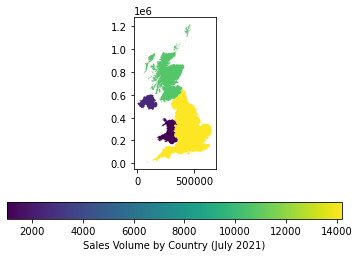

In [11]:
#plot the GeoDataFrames, add the legend and title
fig, ax = plt.subplots(1, 1)
world.plot(column='SalesVolume', 
           ax=ax, 
           legend=True, 
           legend_kwds={'label': "Sales Volume by Country (July 2021)", 'orientation': "horizontal"})
plt.savefig("Images/Sales_UK_July_2021.png")

In [12]:
#upload the shp file
shapefile2 = 'Counties_and_Unitary_Authorities_(December_2016)_Boundaries.shp'

#Read shapefile using Geopandas and keep only LAD's name, code and geometry
gdf2 = gpd.read_file(shapefile2)[['ctyua16nm', 'ctyua16cd', 'geometry']]

#Rename columns.
gdf2.columns = ['country', 'country_code', 'geometry']
gdf2.head()

,country,country_code,geometry
0,Hartlepool,E06000001,"MULTIPOLYGON (((-1.26846 54.72612, -1.26822 54..."
1,Middlesbrough,E06000002,"MULTIPOLYGON (((-1.24390 54.58936, -1.24257 54..."
2,Redcar and Cleveland,E06000003,"MULTIPOLYGON (((-1.13758 54.64581, -1.13781 54..."
3,Stockton-on-Tees,E06000004,"MULTIPOLYGON (((-1.31729 54.64480, -1.31715 54..."
4,Darlington,E06000005,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670..."


In [22]:
# merge shp with the main dataset and keep only Date, Sales and Geometry

merge_df2 = gdf2.merge(full_data_df, left_on = 'country_code', right_on = 'AreaCode')
world2 = merge_df2[['country', 'Date', 'SalesVolume', 'geometry']]
world3 = world2[['country', 'Date', 'SalesVolume']]
#export the dataframe as CSV
#www = world2.to_csv('GfG.csv', index = True)

In [27]:
#highest and lowest sales volume
print('The highest sales volume in July')
print(world3[world3['SalesVolume'] == world3.SalesVolume.max()])
print('The lowest sales volume in July')
print(world3[world3['SalesVolume'] == world3.SalesVolume.min()])

The highest sales volume in July
        country       Date  SalesVolume
135  Lancashire 2021-07-01        486.0
The lowest sales volume in July
       country       Date  SalesVolume
108  Islington 2021-07-01         10.0


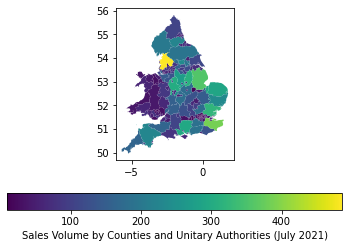

In [14]:
#plot the GeoDataFrames, add the legend and title
fig, ax = plt.subplots(1, 1)
world2.plot(
    column='SalesVolume', 
    ax=ax, 
    legend=True, 
    legend_kwds={'label': "Sales Volume by Counties and Unitary Authorities (July 2021)", 'orientation': "horizontal"})
plt.savefig("Images/Sales_LAD_July_2021.png")